In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
#df.drop_duplicates(inplace = True)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

Exploratory Data Analysis (EDA)

In [10]:
type_counts = df['type'].value_counts()

In [11]:
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


<H4>Plot the Distribution <H4>

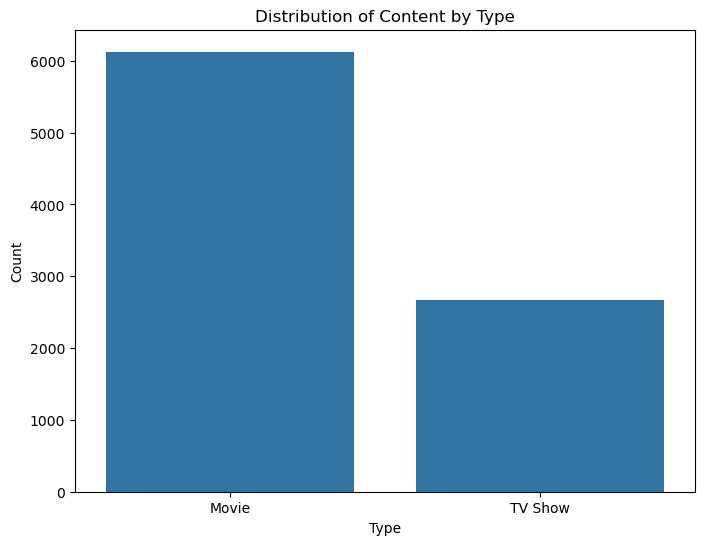

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index,
y=type_counts.values)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Text(0.5, 0.98, 'Total Content on Netflix')

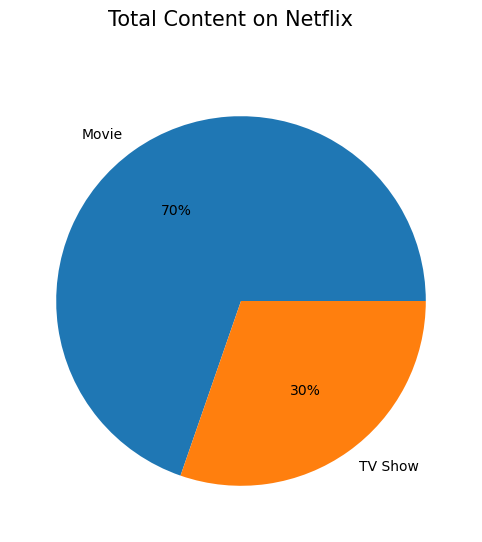

In [13]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1, figsize=(8, 6))
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=15)

In [14]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [15]:
ratings = df['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']
ratings = ratings.sort_values(by='count', ascending=False)

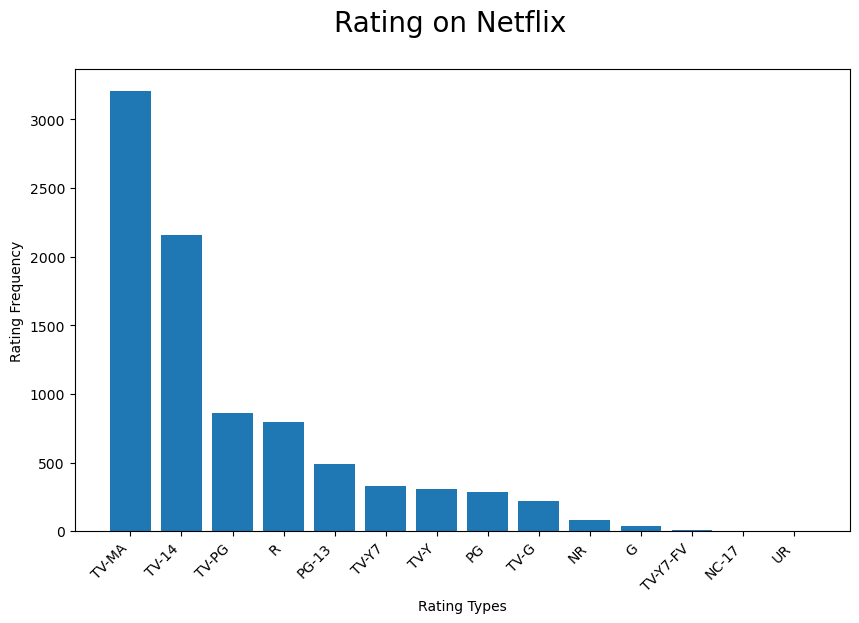

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20);

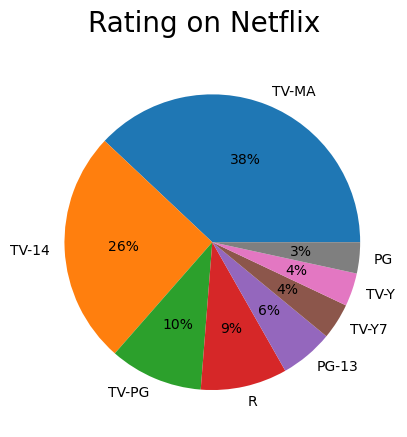

In [17]:
plt.pie(ratings['count'][:8], labels= ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20);

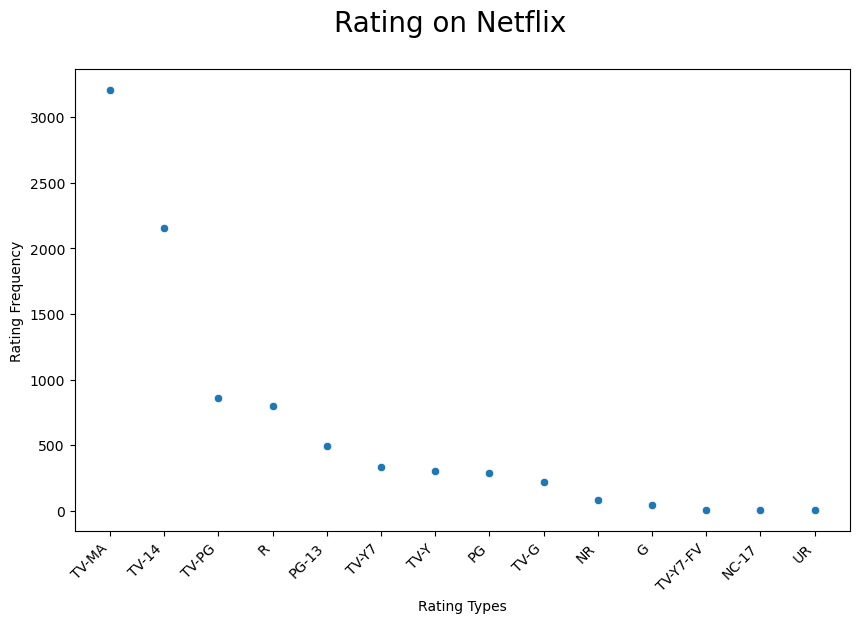

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ratings['rating'],  y=ratings['count'], data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

In [22]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [23]:
top_ten_couteries= df['country'].value_counts().reset_index()[:10]
top_ten_couteries.columns = ['country', 'count']
top_ten_couteries = top_ten_couteries.sort_values(by='count', ascending=False)

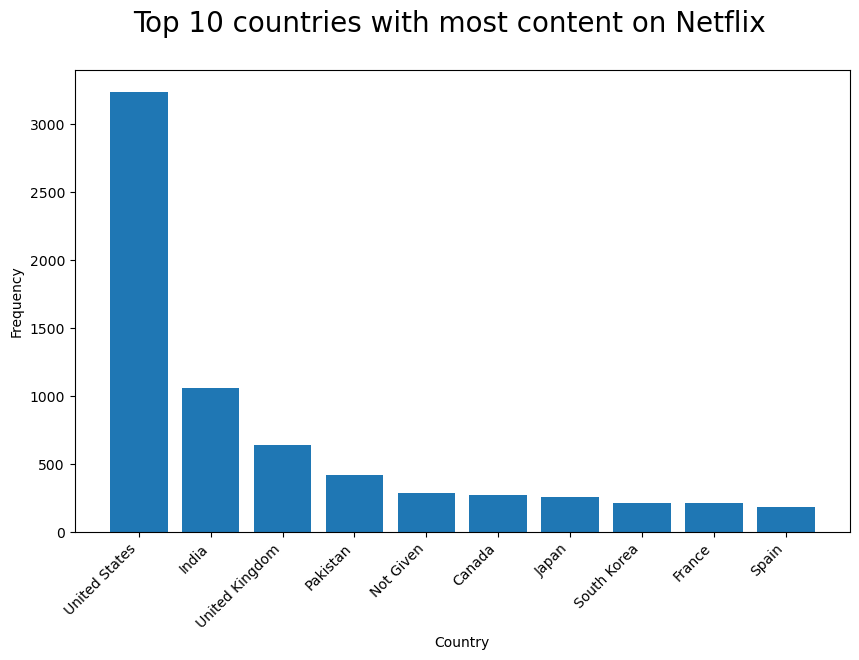

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten_couteries['country'], top_ten_couteries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle('Top 10 countries with most content on Netflix', fontsize=20);

<H4>Analysing Monthly Realese of Movies and Tv Show on Netflix<H4>

In [25]:
df['Year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

In [26]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,9,24
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,9,24
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021,5,1
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021,9,23
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",2021,5,1


In [27]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()

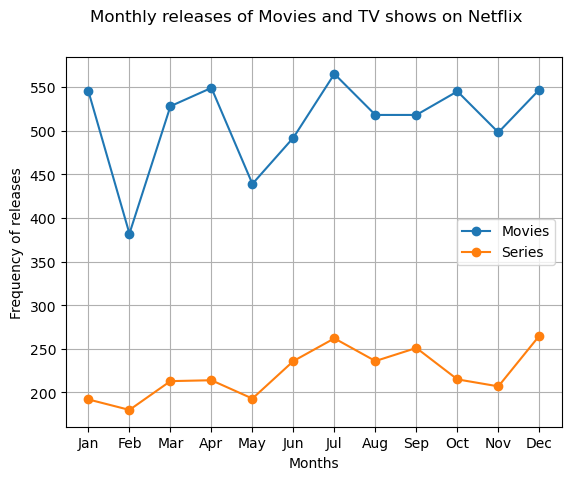

In [28]:
plt.plot(monthly_movie_release.index,monthly_movie_release.values, label='Movies',marker='o')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series',marker='o')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix");

In [29]:
yearly_movie_releases=df[df['type']=='Movie']['Year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['Year'].value_counts().sort_index()

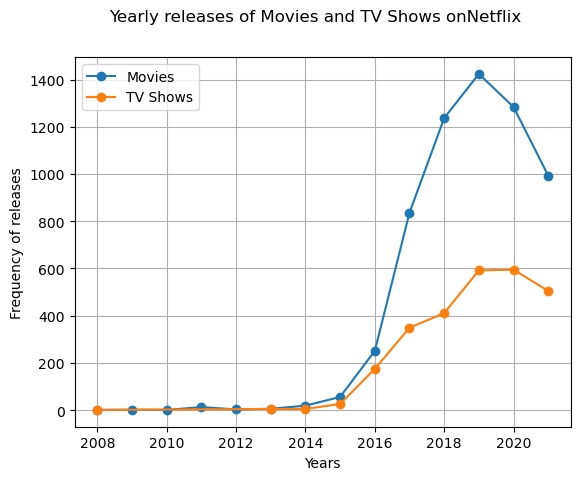

In [30]:
plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies',marker='o')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows',marker='o')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows onNetflix")
plt.legend();

In [31]:
print(df['type'].unique())

['Movie' 'TV Show']


In [32]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

In [33]:
print(popular_movie_genre)
print(popular_series_genre)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64
listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV

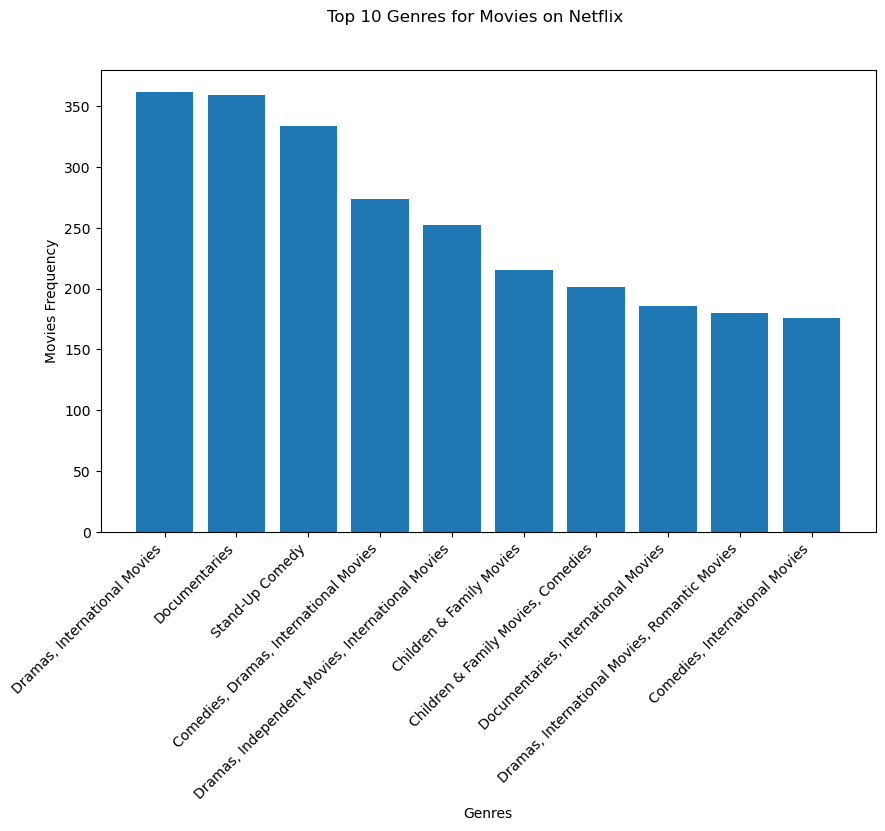

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(popular_movie_genre.index,popular_movie_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 Genres for Movies on Netflix');

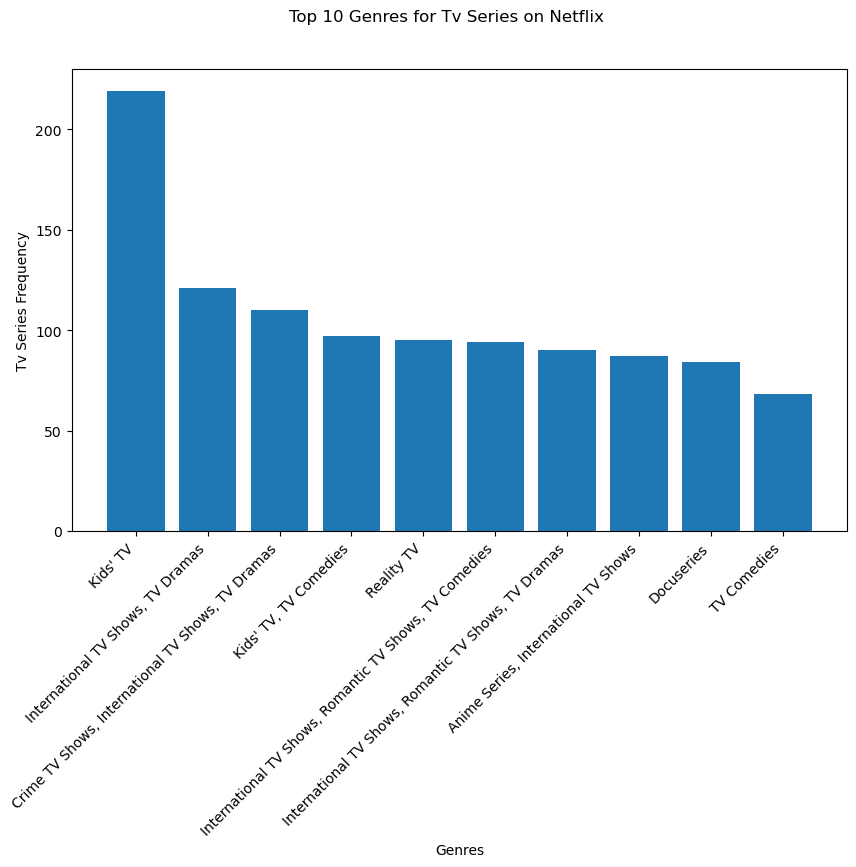

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Tv Series Frequency')
plt.suptitle('Top 10 Genres for Tv Series on Netflix');

In [36]:
directors=df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

In [37]:
print(directors)

                        director  count
1                  Rajiv Chilaka     20
2            Alastair Fothergill     18
3         Raúl Campos, Jan Suter     18
4                    Suhas Kadav     16
5                   Marcus Raboy     16
6                      Jay Karas     14
7            Cathy Garcia-Molina     13
9                Youssef Chahine     12
10                   Jay Chapman     12
8                Martin Scorsese     12
11              Steven Spielberg     11
12  Mark Thornton, Todd Kauffman     10
13              Don Michael Paul     10
14                  David Dhawan      9


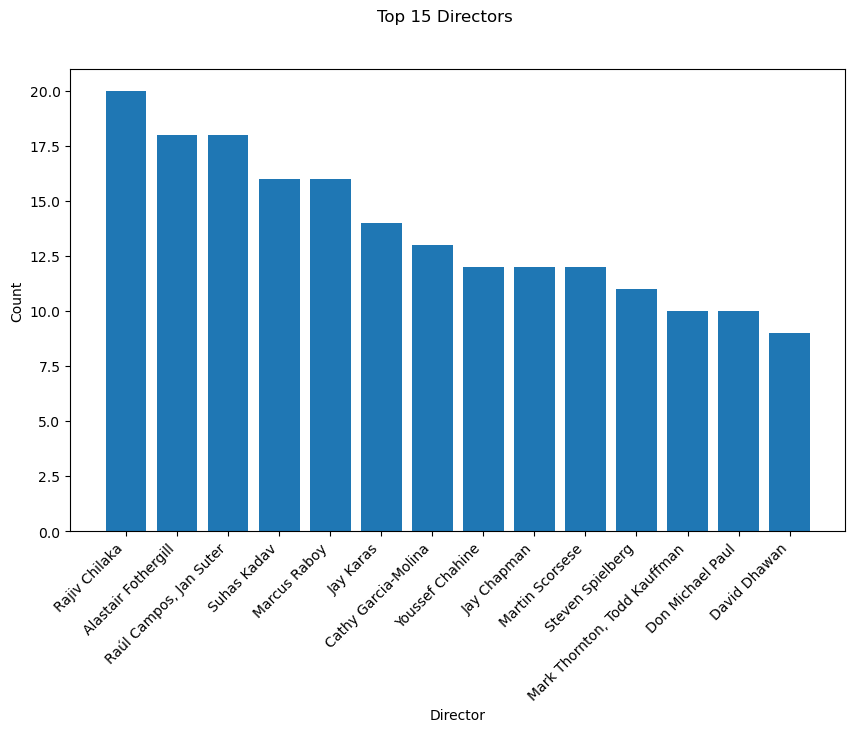

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(directors['director'],directors['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Director')
plt.ylabel('Count')
plt.suptitle('Top 15 Directors');